In [ ]:
!pip install -qq datasets

     |████████████████████████████████| 306 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 45.1 MB/s 
     |████████████████████████████████| 61 kB 447 kB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 243 kB 54.1 MB/s 
     |████████████████████████████████| 160 kB 44.6 MB/s 
     |████████████████████████████████| 192 kB 10.1 MB/s 
     |████████████████████████████████| 271 kB 46.8 MB/s 


## Visualizing

## Loading dataset from the HuggingFace

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("hatexplain")
train_ds = dataset['train']
test_ds = dataset['test']
val_ds = dataset['validation']

Reusing dataset hatexplain (/root/.cache/huggingface/datasets/hatexplain/plain_text/1.0.0/df474d8d8667d89ef30649bf66e9c856ad8305bef4bc147e8e31cbdf1b8e0249)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
label_extractor = lambda x: max(set(x['label']), key = x['label'].count)
train_labels = list(map(label_extractor, train_ds['annotators']))
val_labels = list(map(label_extractor, val_ds['annotators']))
test_labels = list(map(label_extractor, test_ds['annotators']))

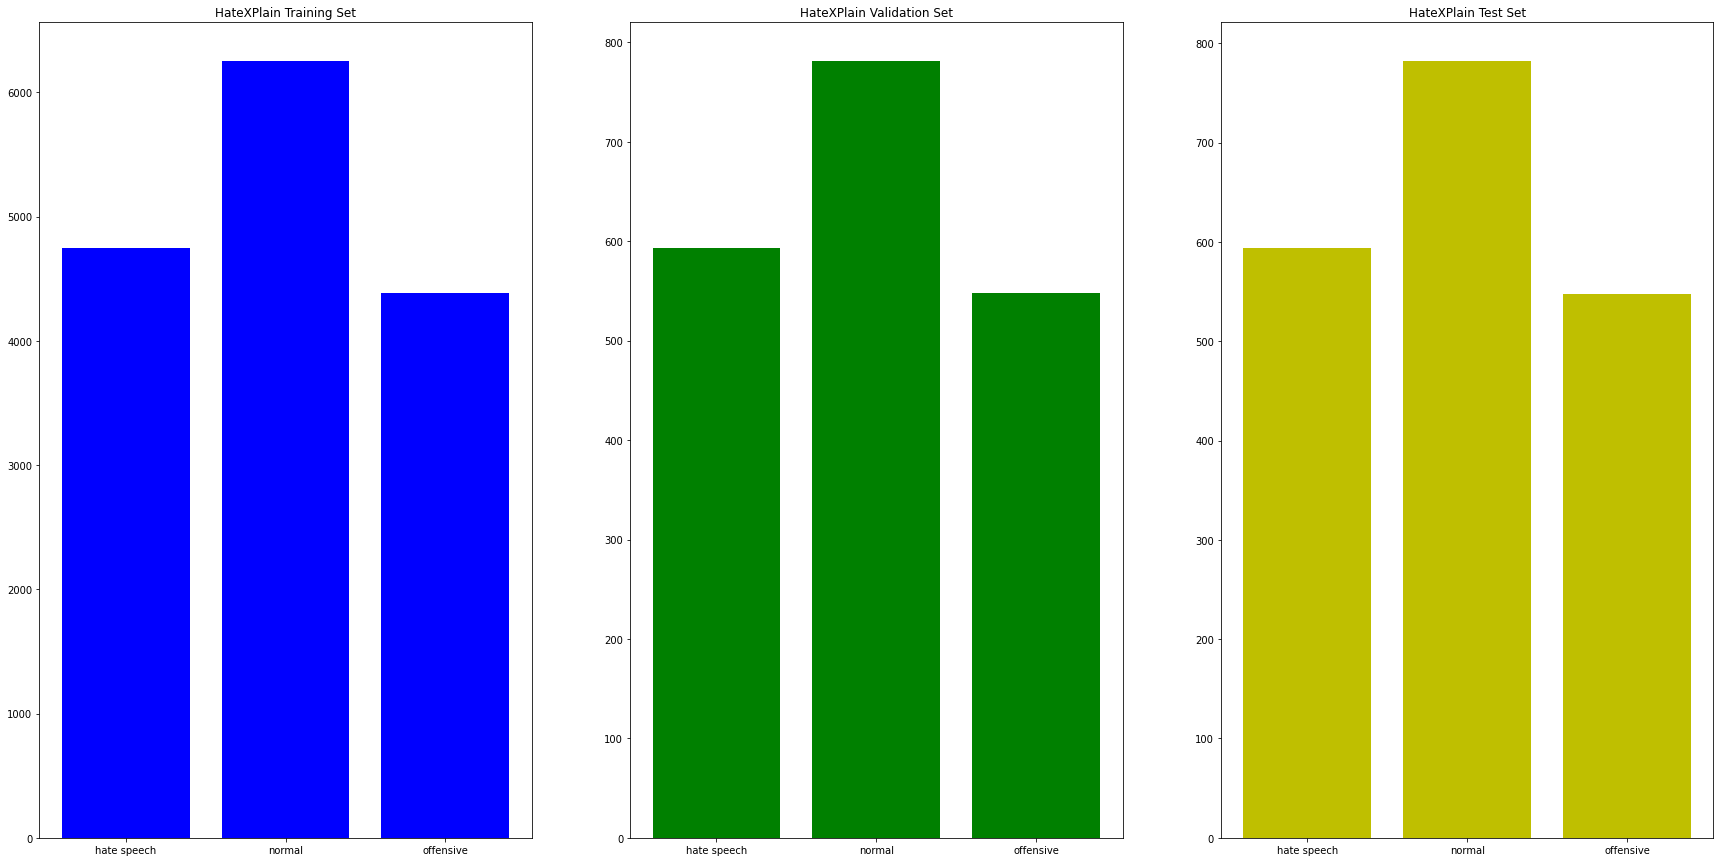

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(30,15))

_ = ax1.bar(x=["hate speech", "normal", "offensive"], 
            height=[sum(np.array(train_labels)==0), sum(np.array(train_labels)==1), sum(np.array(train_labels)==2)],
            color='b')
ax1.title.set_text('HateXPlain Training Set')
_ = ax2.bar(x=["hate speech", "normal", "offensive"], 
            height=[sum(np.array(val_labels)==0), sum(np.array(val_labels)==1), sum(np.array(val_labels)==2)],
            color='g')
ax2.title.set_text('HateXPlain Validation Set')
_ = ax3.bar(x=["hate speech", "normal", "offensive"], 
            height=[sum(np.array(test_labels)==0), sum(np.array(test_labels)==1), sum(np.array(test_labels)==2)],
            color='y')
ax3.title.set_text('HateXPlain Test Set')